<a href="https://colab.research.google.com/github/masa512/PCA/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt


(2, 500)


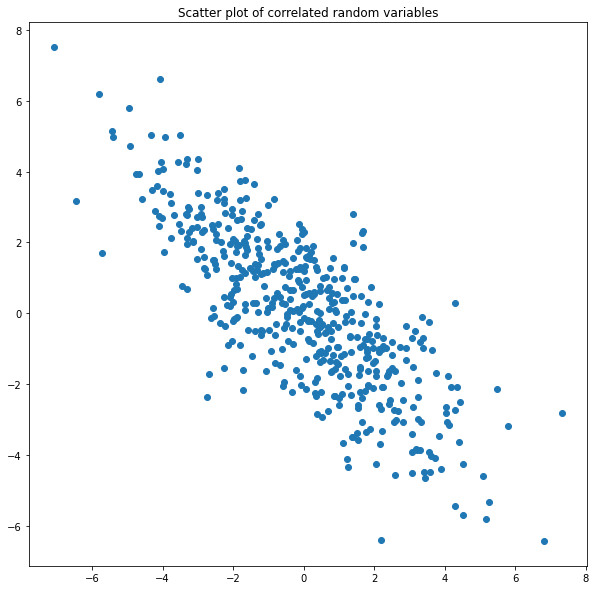

In [6]:
# We will generate data in 2D that we will PCA to 1D

# Two uncorrelated Gaussian random variables
N = 500
r1 = np.random.normal(size=(N,1))
r2 = np.random.normal(size=(N,1)) 

# Generate correlated 2D variables
x = 2*r1 + -1*r2
y = -1*r1 + 2*r2

# Plot the RVs in a 2D scatter plot

fig = plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.title('Scatter plot of correlated random variables')


# Stack data 
D = np.concatenate((x,y),axis=1).T
print(D.shape)

Text(0.5, 1.0, 'Covariance')

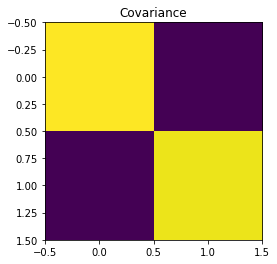

In [7]:
# Define covariance function 

def cov(D):
  N = D.shape[1]
  return (D@D.T)/N

plt.imshow(cov(D))
plt.title('Covariance')

In [17]:
# Eigendecomposition and rank by highest eigenvalue
lambd,U = np.linalg.eig(cov(D))

idx = lambd.argsort()[::-1]
U_sorted = U[:,idx]

# Output dimensionality Nd 
Nd = 1

# Take the top Nd eigenvectors
bases = U_sorted[:,Nd]

[0.6949146  0.71909228]


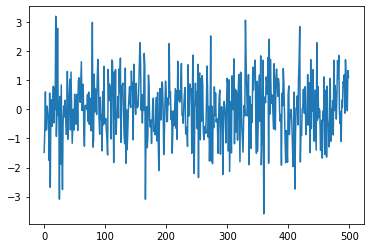

In [20]:
# Project the data onto this eigenbasis
D_trans = bases.T @ D

# Plot the transformed data onto 1D plot now
plt.plot(D_trans)


# 3D application

In [38]:
# We will generate data in 2D that we will PCA to 1D

# Two uncorrelated Gaussian random variables
N = 10
r1 = np.random.normal(size=(N,1))
r2 = np.random.normal(size=(N,1)) 

# Generate correlated 2D variables
x = 2*r1 + -1*r2
y = -1*r1 + 2*r2
z = 2*r1 + 3*r2
# Stack data 
D = np.concatenate((x,y,z),axis=1).T
print(D.shape)

(3, 10)


[[ 6.85204753 -4.99562948  2.66643231]
 [-4.99562948  4.6732762   0.80560108]
 [ 2.66643231  0.80560108  8.36994494]]


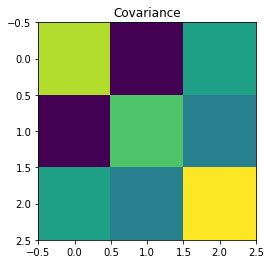

In [39]:
# Define covariance function 

covD = cov(D)
plt.imshow(covD)
plt.title('Covariance')

print(covD)

In [50]:
# Eigendecomposition and rank by highest eigenvalue
lambd,U = np.linalg.eig(covD)

idx = lambd.argsort()[::-1]
U_sorted = U[:,idx]

# Output dimensionality Nd 
Nd = 2
# Take the top Nd eigenvectors
bases = U_sorted[:,:Nd]

# Project the data onto this eigenbasis
D_trans = bases.T @ D
print(D_trans.shape)

ValueError: ignored

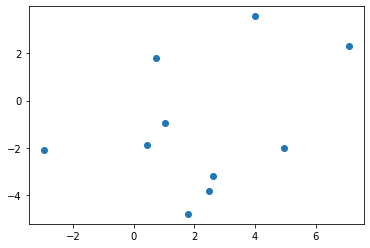

In [41]:
plt.scatter(D_trans[0,:].reshape((1,-1)),D_trans[1,:].reshape((1,-1)))

# What if we have multiple data distributions in 3D?

In [61]:
def cov(D):
  N = D.shape[1]
  return (D@D.T)/N

def PCA(data,Nd):
  C = cov(data)
  lambd,U = np.linalg.eig(C)

  U_sorted = U[:,lambd.argsort()[::-1]]
  bases = U_sorted[:,:Nd]
  return np.real(bases.T@data)

def rng(low,high):
  return np.random.randint(low, high)

def gen_data(d = 3, N = 100):
  r1 = np.random.normal(size=(N,1))
  r2 = np.random.normal(size=(N,1)) 

  x = r1*rng(-5,5) + r2*rng(-5,5)
  y = r1*rng(-5,5) + r2*rng(-5,5)
  z = r1*rng(-5,5) + r2*rng(-5,5)

  return x,y,z

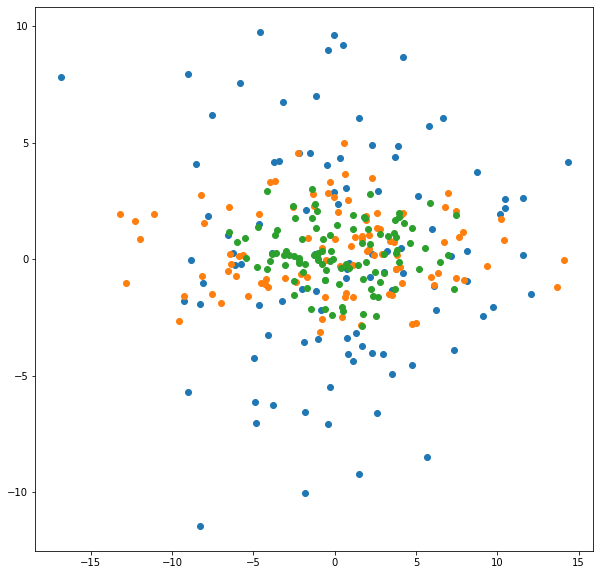

In [64]:
# Generate 3 different Clusters of data distributions
N = 100
Nc = 3
Nd = 2
D = [np.concatenate(gen_data(d=3,N=N),axis=1).T for _ in range(Nc)]

# Run PCA on these data
Dtrans = [PCA(Di,Nd=Nd) for Di in D]

# Plot the cluster on the same plot
plt.figure(figsize=(10,10))
plt.scatter(Dtrans[0][0,None],Dtrans[0][1,None])
plt.scatter(Dtrans[1][0,None],Dtrans[1][1,None])
plt.scatter(Dtrans[2][0,None],Dtrans[2][1,None])